### Will a Customer Accept the Coupon? Humberto Sebastian Turpo Huaman

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# Load the dataset
file_path = 'data/coupons.csv'  # Update this path if needed
coupons_df = pd.read_csv(file_path)

# Investigate the dataset for missing or problematic data
missing_data_summary = coupons_df.isnull().sum()
missing_data_percentage = (coupons_df.isnull().sum() / len(coupons_df)) * 100

# Create a DataFrame to display the summary of missing data
missing_data_df = pd.DataFrame({
    'Missing Values': missing_data_summary,
    'Percentage': missing_data_percentage
})

# Display the summary of missing data
missing_data_df

,Missing Values,Percentage
destination,0,0.000000
passanger,0,0.000000
weather,0,0.000000
temperature,0,0.000000
time,0,0.000000
coupon,0,0.000000
expiration,0,0.000000
gender,0,0.000000
age,0,0.000000
maritalStatus,0,0.000000


3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# Drop the 'car' column due to high percentage of missing values
coupons_df = coupons_df.drop(columns=['car'])

# Impute missing values in categorical columns with mode
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    mode_value = coupons_df[column].mode()[0]
    coupons_df[column].fillna(mode_value, inplace=True)

# Display the cleaned DataFrame summary
cleaned_missing_data_summary = coupons_df.isnull().sum()
cleaned_missing_data_percentage = (coupons_df.isnull().sum() / len(coupons_df)) * 100

cleaned_missing_data_df = pd.DataFrame({
    'Missing Values': cleaned_missing_data_summary,
    'Percentage': cleaned_missing_data_percentage
})

cleaned_missing_data_df

,Missing Values,Percentage
destination,0,0.0
passanger,0,0.0
weather,0,0.0
temperature,0,0.0
time,0,0.0
coupon,0,0.0
expiration,0,0.0
gender,0,0.0
age,0,0.0
maritalStatus,0,0.0


4. What proportion of the total observations chose to accept the coupon? 



In [6]:
# Calculate the proportion of total observations that chose to accept the coupon
coupon_acceptance_proportion = coupons_df['Y'].mean()

# Convert to percentage and display with a message
print(f"The proportion of total observations that chose to accept the coupon is: {coupon_acceptance_proportion:.2%}")


The proportion of total observations that chose to accept the coupon is: 56.84%


5. Use a bar plot to visualize the `coupon` column.

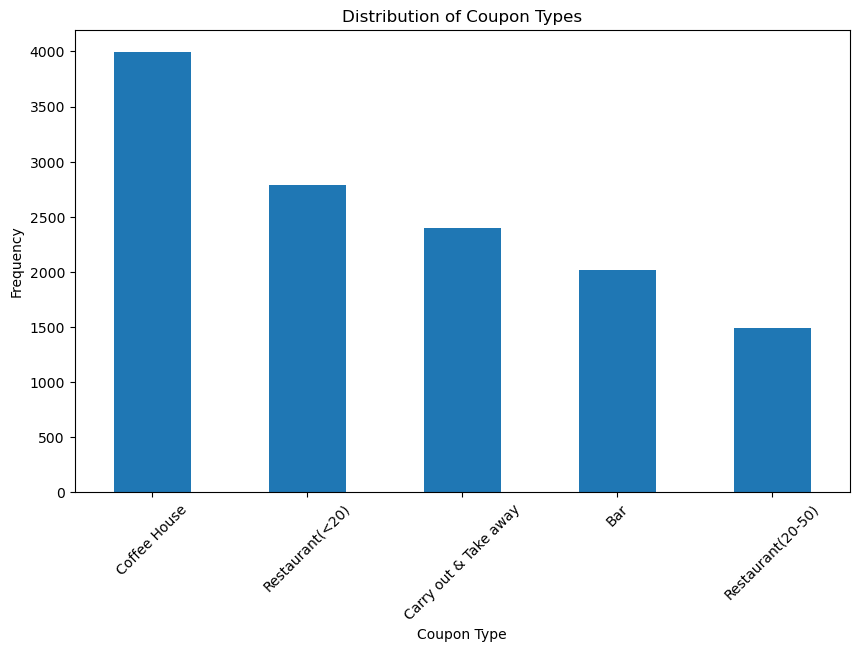

In [7]:


# Count the occurrences of each coupon type
coupon_counts = coupons_df['coupon'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
coupon_counts.plot(kind='bar')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

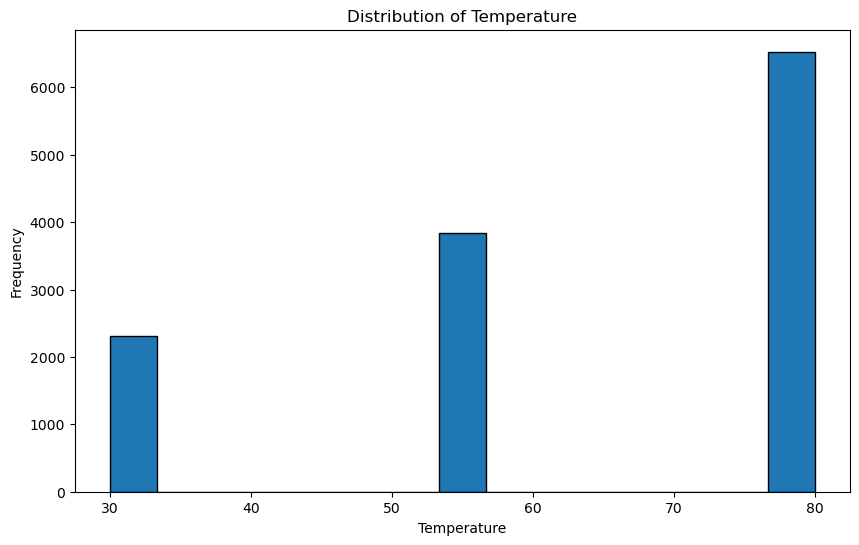

In [8]:
# Calculate the number of bins using Sturges' rule
num_bins = int(np.ceil(np.log2(len(coupons_df['temperature'])) + 1))

# Create the histogram using the calculated number of bins
plt.figure(figsize=(10, 6))
plt.hist(coupons_df['temperature'], bins=num_bins, edgecolor='k')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
bar_coupons_df = coupons_df[coupons_df['coupon'] == 'Bar']
bar_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [10]:
# Calculate the proportion of bar coupons accepted
proportion_accepted = bar_coupons_df['Y'].mean()

# Display the result with a message and formatted as a percentage
print(f"Proportion of bar coupons accepted: {proportion_accepted:.2%}")

Proportion of bar coupons accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [11]:
# Calculate acceptance rates
acceptance_rate_fewer_than_3 = bar_coupons_df[bar_coupons_df['Bar'] == '1~3']['Y'].mean()
acceptance_rate_more_than_3 = bar_coupons_df[bar_coupons_df['Bar'] == '4~8']['Y'].mean()

# Display the results with messages and formatted as percentages
print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {acceptance_rate_fewer_than_3:.2%}")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {acceptance_rate_more_than_3:.2%}")


Acceptance rate for those who went to a bar 3 or fewer times a month: 64.74%
Acceptance rate for those who went to a bar more than 3 times a month: 78.00%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [12]:


# Map the age ranges to numeric values (e.g., use the lower bound of the range)
def map_age_range(age_range):
    if age_range == 'below 21':
        return 20
    elif age_range == '21 to 25':
        return 23
    elif age_range == '26 to 30':
        return 28
    elif age_range == '31 to 35':
        return 33
    elif age_range == '36 to 40':
        return 38
    elif age_range == '41 to 45':
        return 43
    elif age_range == '46 to 50':
        return 48
    elif age_range == '51 to 55':
        return 53
    elif age_range == '56 to 60':
        return 58
    elif age_range == '61 to 65':
        return 63
    elif age_range == '66 to 70':
        return 68
    elif age_range == '71 to 75':
        return 73
    elif age_range == '76 to 80':
        return 78
    else:
        return 0  # Default logical value for unexpected age ranges

# Ensure the 'age' column is converted to integers
bar_coupons_df = bar_coupons_df.copy()  # Create a copy of the DataFrame to avoid the warning
bar_coupons_df['age_numeric'] = bar_coupons_df['age'].apply(map_age_range)

# Calculate the acceptance rates for the specified conditions
acceptance_rate_over_25 = bar_coupons_df[(bar_coupons_df['Bar'] == '1~3') & (bar_coupons_df['age_numeric'] > 25)]['Y'].mean()
acceptance_rate_others = bar_coupons_df[(bar_coupons_df['Bar'] != '1~3') | (bar_coupons_df['age_numeric'] <= 25)]['Y'].mean()

# Replace NaN with a logical value
acceptance_rate_over_25 = acceptance_rate_over_25 if not pd.isna(acceptance_rate_over_25) else 0
acceptance_rate_others = acceptance_rate_others if not pd.isna(acceptance_rate_others) else 0

# Display the results with messages and formatted as percentages
print(f"Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {acceptance_rate_over_25:.2%}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_others:.2%}")

# Determine if there is a difference
difference = acceptance_rate_over_25 - acceptance_rate_others
print(f"Difference in acceptance rates: {difference:.2%}")


Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 0.00%
Acceptance rate for all other drivers: 41.00%
Difference in acceptance rates: -41.00%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [13]:
# Calculate the acceptance rate for specified conditions
acceptance_rate_not_kid_not_farming = bar_coupons_df[(bar_coupons_df['Bar'] == '1~3') & 
                                                     (bar_coupons_df['passanger'] != 'Kid(s)') & 
                                                     (bar_coupons_df['occupation'] != 'farming, fishing, or forestry')]['Y'].mean()

# Display the result with a message and formatted as a percentage
print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry: {acceptance_rate_not_kid_not_farming:.2%}")


Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry: 68.06%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [14]:

# Map the age ranges to numeric values (e.g., use the lower bound of the range)
def map_age_range(age_range):
    if age_range == 'below 21':
        return 20
    elif age_range == '21 to 25':
        return 23
    elif age_range == '26 to 30':
        return 28
    elif age_range == '31 to 35':
        return 33
    elif age_range == '36 to 40':
        return 38
    elif age_range == '41 to 45':
        return 43
    elif age_range == '46 to 50':
        return 48
    elif age_range == '51 to 55':
        return 53
    elif age_range == '56 to 60':
        return 58
    elif age_range == '61 to 65':
        return 63
    elif age_range == '66 to 70':
        return 68
    elif age_range == '71 to 75':
        return 73
    elif age_range == '76 to 80':
        return 78
    else:
        return 0  # Default logical value for unexpected age ranges

# Ensure the 'age' column is converted to numeric values
bar_coupons_df = bar_coupons_df.copy()  # Create a copy of the DataFrame to avoid the warning
bar_coupons_df['age_numeric'] = bar_coupons_df['age'].apply(map_age_range)

# Condition 1: Go to bars more than once a month, had passengers that were not a kid, and were not widowed
condition_1 = bar_coupons_df[(bar_coupons_df['Bar'] == '1~3') & 
                             (bar_coupons_df['passanger'] != 'Kid(s)') & 
                             (bar_coupons_df['maritalStatus'] != 'Widowed')]['Y'].mean()

# Condition 2: Go to bars more than once a month and are under the age of 30
condition_2 = bar_coupons_df[(bar_coupons_df['Bar'] == '1~3') & 
                             (bar_coupons_df['age_numeric'] < 30)]['Y'].mean()

# Condition 3: Go to cheap restaurants more than 4 times a month and income is less than 50K
# Adjust the income condition based on the actual income categories in your dataset
condition_3 = bar_coupons_df[(bar_coupons_df['RestaurantLessThan20'] == '4~8') & 
                             (bar_coupons_df['income'].str.contains('less than \$12500|12500 - \$24999|25000 - \$37499|37500 - \$49999'))]['Y'].mean()

# Replace NaN with a logical value or message
condition_1 = condition_1 if not pd.isna(condition_1) else 0
condition_2 = condition_2 if not pd.isna(condition_2) else 0
condition_3 = condition_3 if not pd.isna(condition_3) else 0

# Display the results with messages and formatted as percentages
print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {condition_1:.2%}")
print(f"Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: {condition_2:.2%}")
print(f"Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {condition_3:.2%}")


Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 68.06%
Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: 64.74%
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 41.58%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on these observations, we can hypothesize that drivers who are more likely to accept bar coupons tend to be frequent bar-goers who are accompanied by friends or partners (but not kids), and are typically younger (under 30). Additionally, those who frequently visit cheaper restaurants and have lower incomes may also be more likely to accept bar coupons.

This hypothesis is based on the observed acceptance rates under various conditions and helps identify the characteristics of drivers who are more inclined to accept bar coupons.

### Independent Investigation- Coffee House

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In this section, we will delve into the analysis of coffee house coupon acceptance. The goal is to understand the factors influencing whether customers accept or decline coffee house coupons. By examining various user and contextual attributes, we aim to identify patterns and insights that can help in designing targeted marketing strategies to increase coupon acceptance rates.


In [15]:
coffee_coupons_df = coupons_df[coupons_df['coupon'] == 'Coffee House']
coffee_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


a. What is the acceptance rate of coffee house coupons among customers?



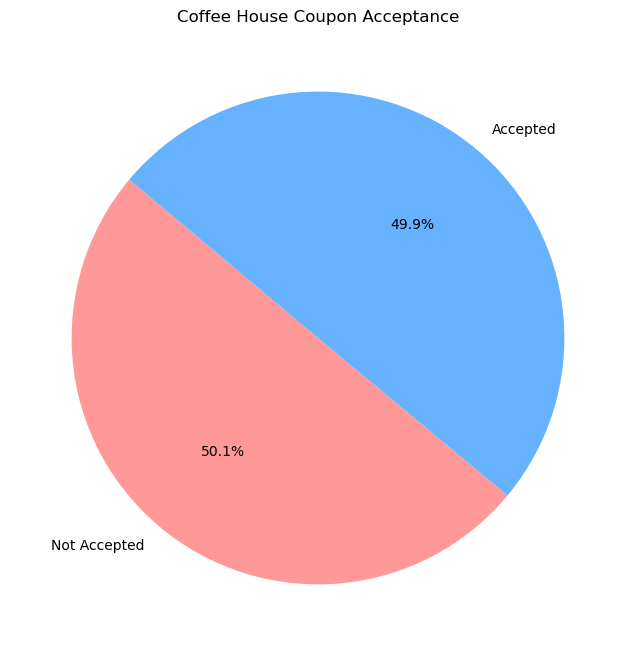

In [16]:
import os

# Calculate the acceptance rate for coffee house coupons
acceptance_counts = coffee_coupons_df['Y'].value_counts()

# Labels for the pie chart
labels = ['Not Accepted', 'Accepted']

# Colors for the pie chart
colors = ['#FF9999', '#66B2FF']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(acceptance_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Coffee House Coupon Acceptance')



# Save the plot to the 'images' folder
plt.savefig('images/Coffee_House_Coupon_Acceptance_Pie_Chart.png')

plt.show()


The pie chart reveals that the acceptance rate for coffee house coupons is 49.7%, while the rejection rate is 50.3%.

b. Is there a noticeable age difference between customers who accept and those who reject coffee house coupons?


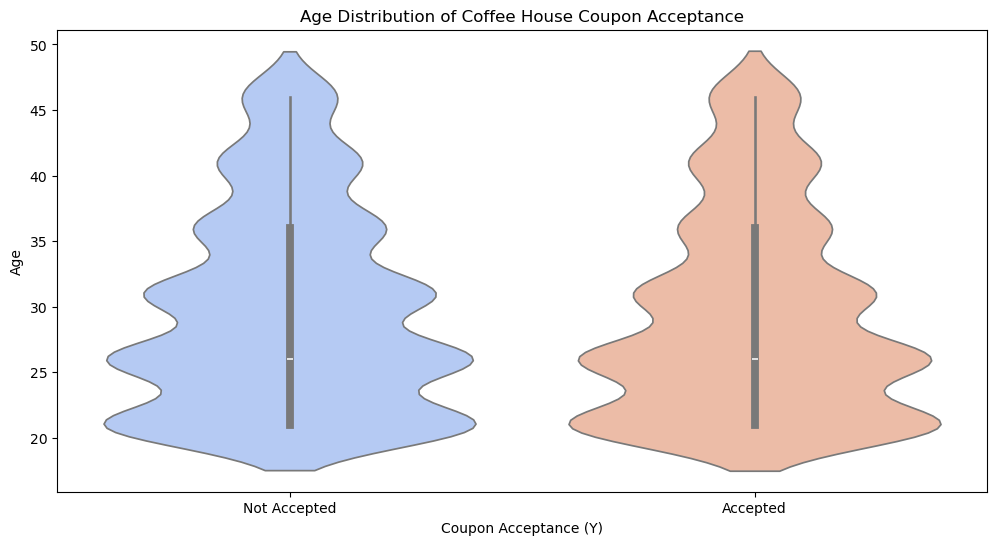

In [17]:
# Ensure age is numeric
coffee_coupons_df.loc[:, 'age'] = pd.to_numeric(coffee_coupons_df['age'], errors='coerce')

# Drop rows with NaN values in age
coffee_coupons_df = coffee_coupons_df.dropna(subset=['age'])

# Violin plot for age distribution based on coupon acceptance
plt.figure(figsize=(12, 6))
sns.violinplot(x='Y', y='age', data=coffee_coupons_df, hue='Y', dodge=False, palette='coolwarm', legend=False)
plt.title('Age Distribution of Coffee House Coupon Acceptance')
plt.xlabel('Coupon Acceptance (Y)')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])


# Save the plot to the 'images' folder
plt.savefig('images/Age_Distribution_Coffee_House_Coupon_Acceptance.png')

plt.show()

The violin plot shows that the age distribution for coffee house coupon acceptance is quite similar between those who accept and those who do not, with a slight concentration of acceptances around the age of 25 to 30. This indicates that younger individuals tend to accept the coupons slightly more often.








c. How does income distribution vary between customers who accept and those who reject coffee house coupons?


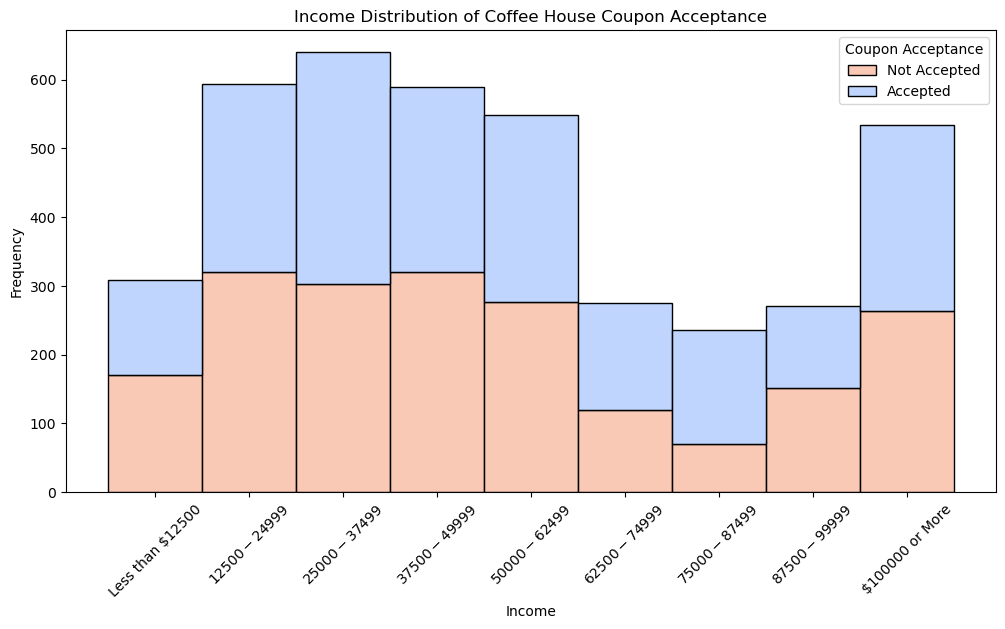

In [18]:
# Ensure coffee_coupons_df is already defined with the "Coffee House" coupons
coffee_coupons_df = coupons_df[coupons_df['coupon'] == 'Coffee House'].copy()

# Define the correct order for the 'income' categories
income_order = [
    'Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', 
    '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', 
    '$100000 or More'
]

# Convert the 'income' column to a categorical type with the specified order
coffee_coupons_df['income'] = pd.Categorical(coffee_coupons_df['income'], categories=income_order, ordered=True)

# Create the histogram for income distribution based on coupon acceptance
plt.figure(figsize=(12, 6))
sns.histplot(data=coffee_coupons_df, x='income', hue='Y', multiple='stack', 
             palette='coolwarm', edgecolor='k', hue_order=[0, 1])
plt.title('Income Distribution of Coffee House Coupon Acceptance')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Coupon Acceptance', labels=['Not Accepted', 'Accepted'])

# Save the plot to the 'images' folder
plt.savefig('images/Income_Distribution_Coffee_House_Coupon_Acceptance.png')

plt.show()


The histogram reveals that higher income groups tend to accept coffee house coupons more frequently, while lower income groups show less acceptance. This suggests a trend where higher income individuals are more responsive to coupon offers.






d.How does the frequency of visits to different types of venues (bars, takeaway food, coffee houses, and restaurants) influence the acceptance of coffee house coupons?



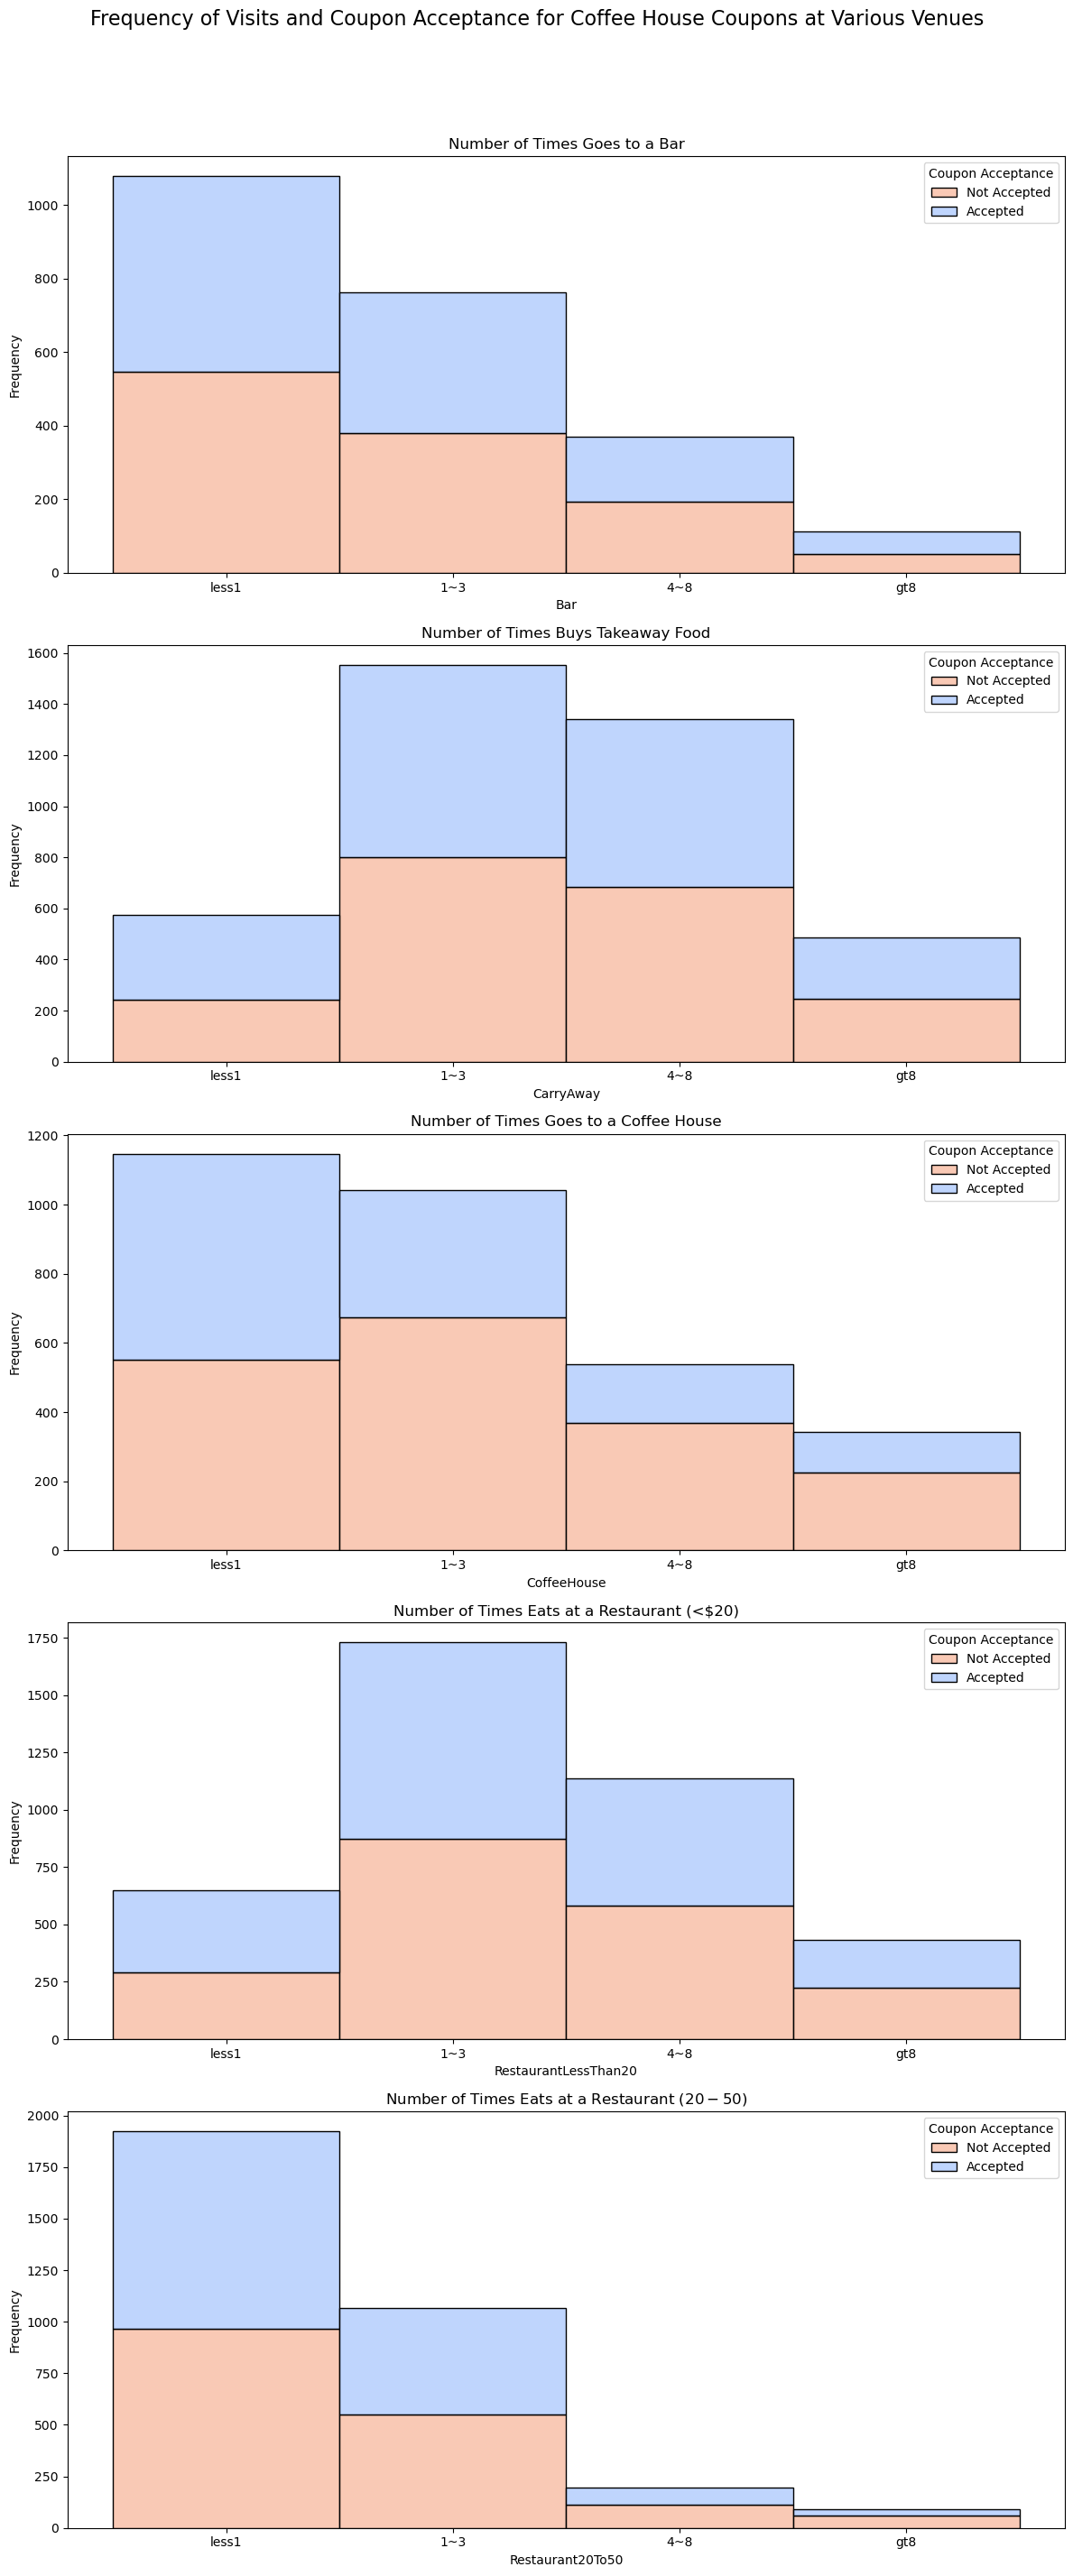

In [19]:


# Convert frequencies to ordered categorical variables
frequency_order = ['0', 'less1', '1~3', '4~8', 'gt8']

# Ensure the variables are in the correct order
for col in ['Bar', 'CarryAway', 'CoffeeHouse', 'RestaurantLessThan20', 'Restaurant20To50']:
    coffee_coupons_df[col] = pd.Categorical(coffee_coupons_df[col], categories=frequency_order, ordered=True)

# List of columns to plot
columns_to_plot = ['Bar', 'CarryAway', 'CoffeeHouse', 'RestaurantLessThan20', 'Restaurant20To50']
titles = [
    'Number of Times Goes to a Bar',
    'Number of Times Buys Takeaway Food',
    'Number of Times Goes to a Coffee House',
    'Number of Times Eats at a Restaurant (<$20)',
    'Number of Times Eats at a Restaurant ($20-$50)'
]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 30))

# Generate histograms for each variable
for i, col in enumerate(columns_to_plot):
    sns.histplot(data=coffee_coupons_df, x=col, hue='Y', multiple='stack', palette='coolwarm', kde=False, ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].legend(title='Coupon Acceptance', labels=['Not Accepted', 'Accepted'])

# Add an overall title to the figure
fig.suptitle('Frequency of Visits and Coupon Acceptance for Coffee House Coupons at Various Venues', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# Save the plot to the 'images' folder
plt.savefig('images/Coffee_House_Coupon_Acceptance_Venue_Frequency.png')

plt.show()


The chart shows the distribution of coffee house coupon acceptance based on the frequency of visits to various types of venues. The findings indicate that individuals who visit these venues moderately (1-3 times) are more likely to accept coffee house coupons. In contrast, those who visit very frequently (more than 8 times) tend to accept fewer coupons.









e.How do various user attributes such as marital status, number of children, education level, and occupation influence the acceptance of coffee house coupons?



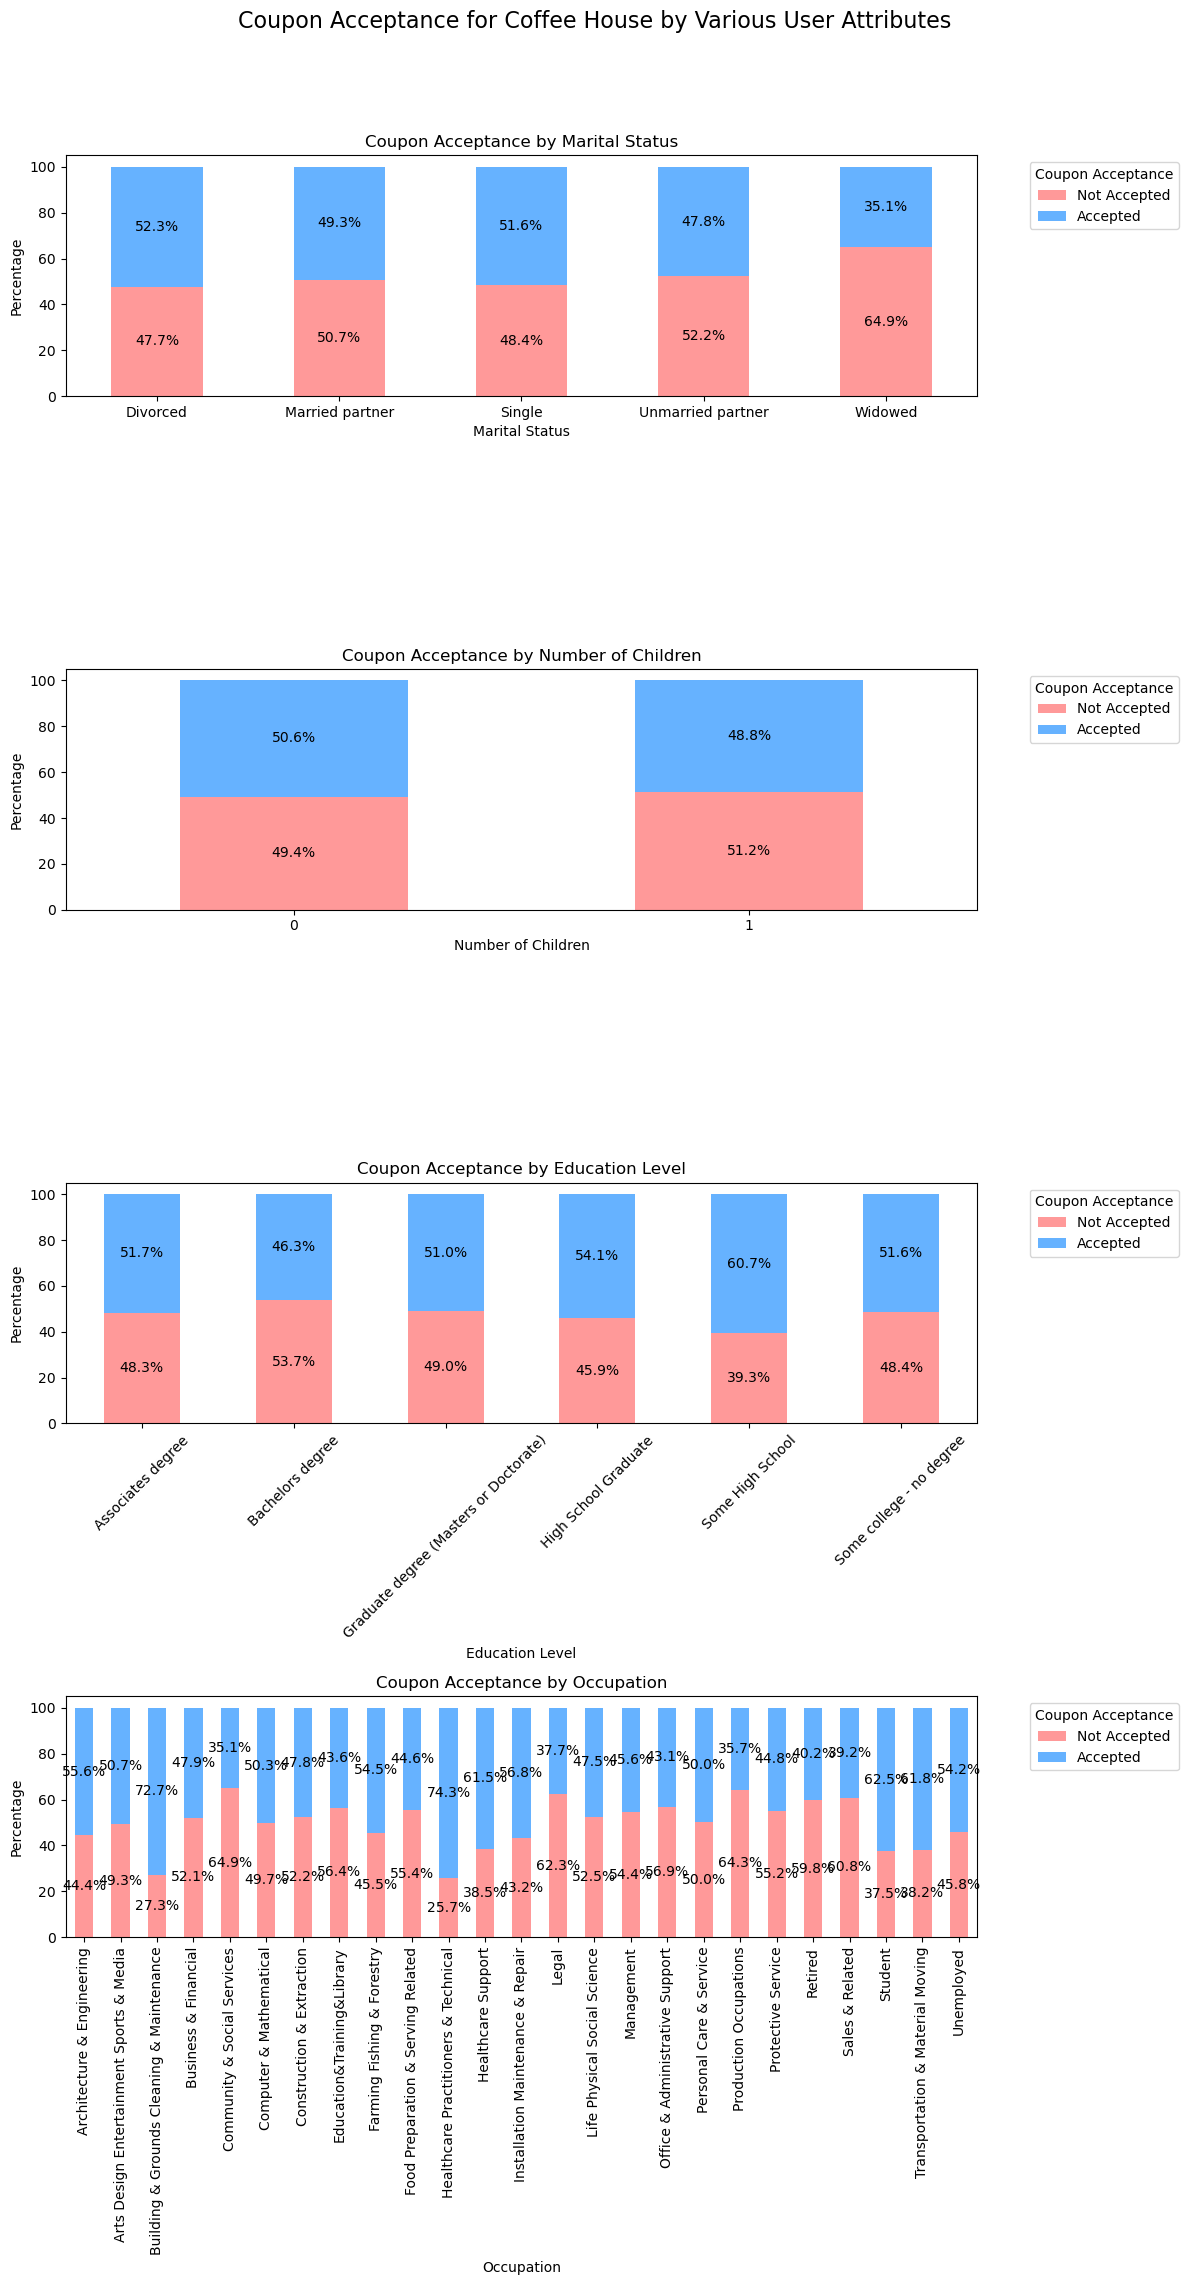

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Function to plot percentage plots
def plot_percentage(ax, data, x, hue, title, xlabel, rotation=0):
    # Calculate the percentage of each category
    percentages = data.groupby(x)[hue].value_counts(normalize=True).unstack(fill_value=0) * 100
    
    # Plot the percentage data as a bar plot
    percentages.plot(kind='bar', stacked=True, color=['#FF9999', '#66B2FF'], ax=ax)
    
    # Set titles and labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Percentage')
    ax.legend(title='Coupon Acceptance', labels=['Not Accepted', 'Accepted'], bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Rotate x-axis labels if needed
    ax.tick_params(axis='x', rotation=rotation)
    
    # Annotate percentages on the bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only annotate if height is greater than 0
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + height / 2
            ax.annotate(f'{height:.1f}%', (x, y), ha='center', va='center')

# Create subplots for each user attribute
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 24))  # Adjusted for vertical layout
axes = axes.flatten()

# Marital Status
plot_percentage(axes[0], coffee_coupons_df, 'maritalStatus', 'Y', 'Coupon Acceptance by Marital Status', 'Marital Status')

# Number of children
plot_percentage(axes[1], coffee_coupons_df, 'has_children', 'Y', 'Coupon Acceptance by Number of Children', 'Number of Children')

# Education
plot_percentage(axes[2], coffee_coupons_df, 'education', 'Y', 'Coupon Acceptance by Education Level', 'Education Level', rotation=45)

# Occupation
plot_percentage(axes[3], coffee_coupons_df, 'occupation', 'Y', 'Coupon Acceptance by Occupation', 'Occupation', rotation=90)

# Add an overall title to the figure
fig.suptitle('Coupon Acceptance for Coffee House by Various User Attributes', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot to the 'images' folder
plt.savefig('images/Coffee_House_Coupon_Acceptance_User_Attributes.png')

plt.show()


The chart reveals that divorced individuals and those in healthcare and education fields have higher acceptance rates for coffee house coupons. In contrast, widowed individuals and those in legal and protective services show lower acceptance rates. People without children are more likely to accept coupons than those with children. Additionally, individuals with some high school education exhibit higher acceptance rates. Overall, marital status, occupation, number of children, and education level significantly influence coupon acceptance behavior.









f. How do various contextual attributes affect the acceptance rate of coffee house coupons?



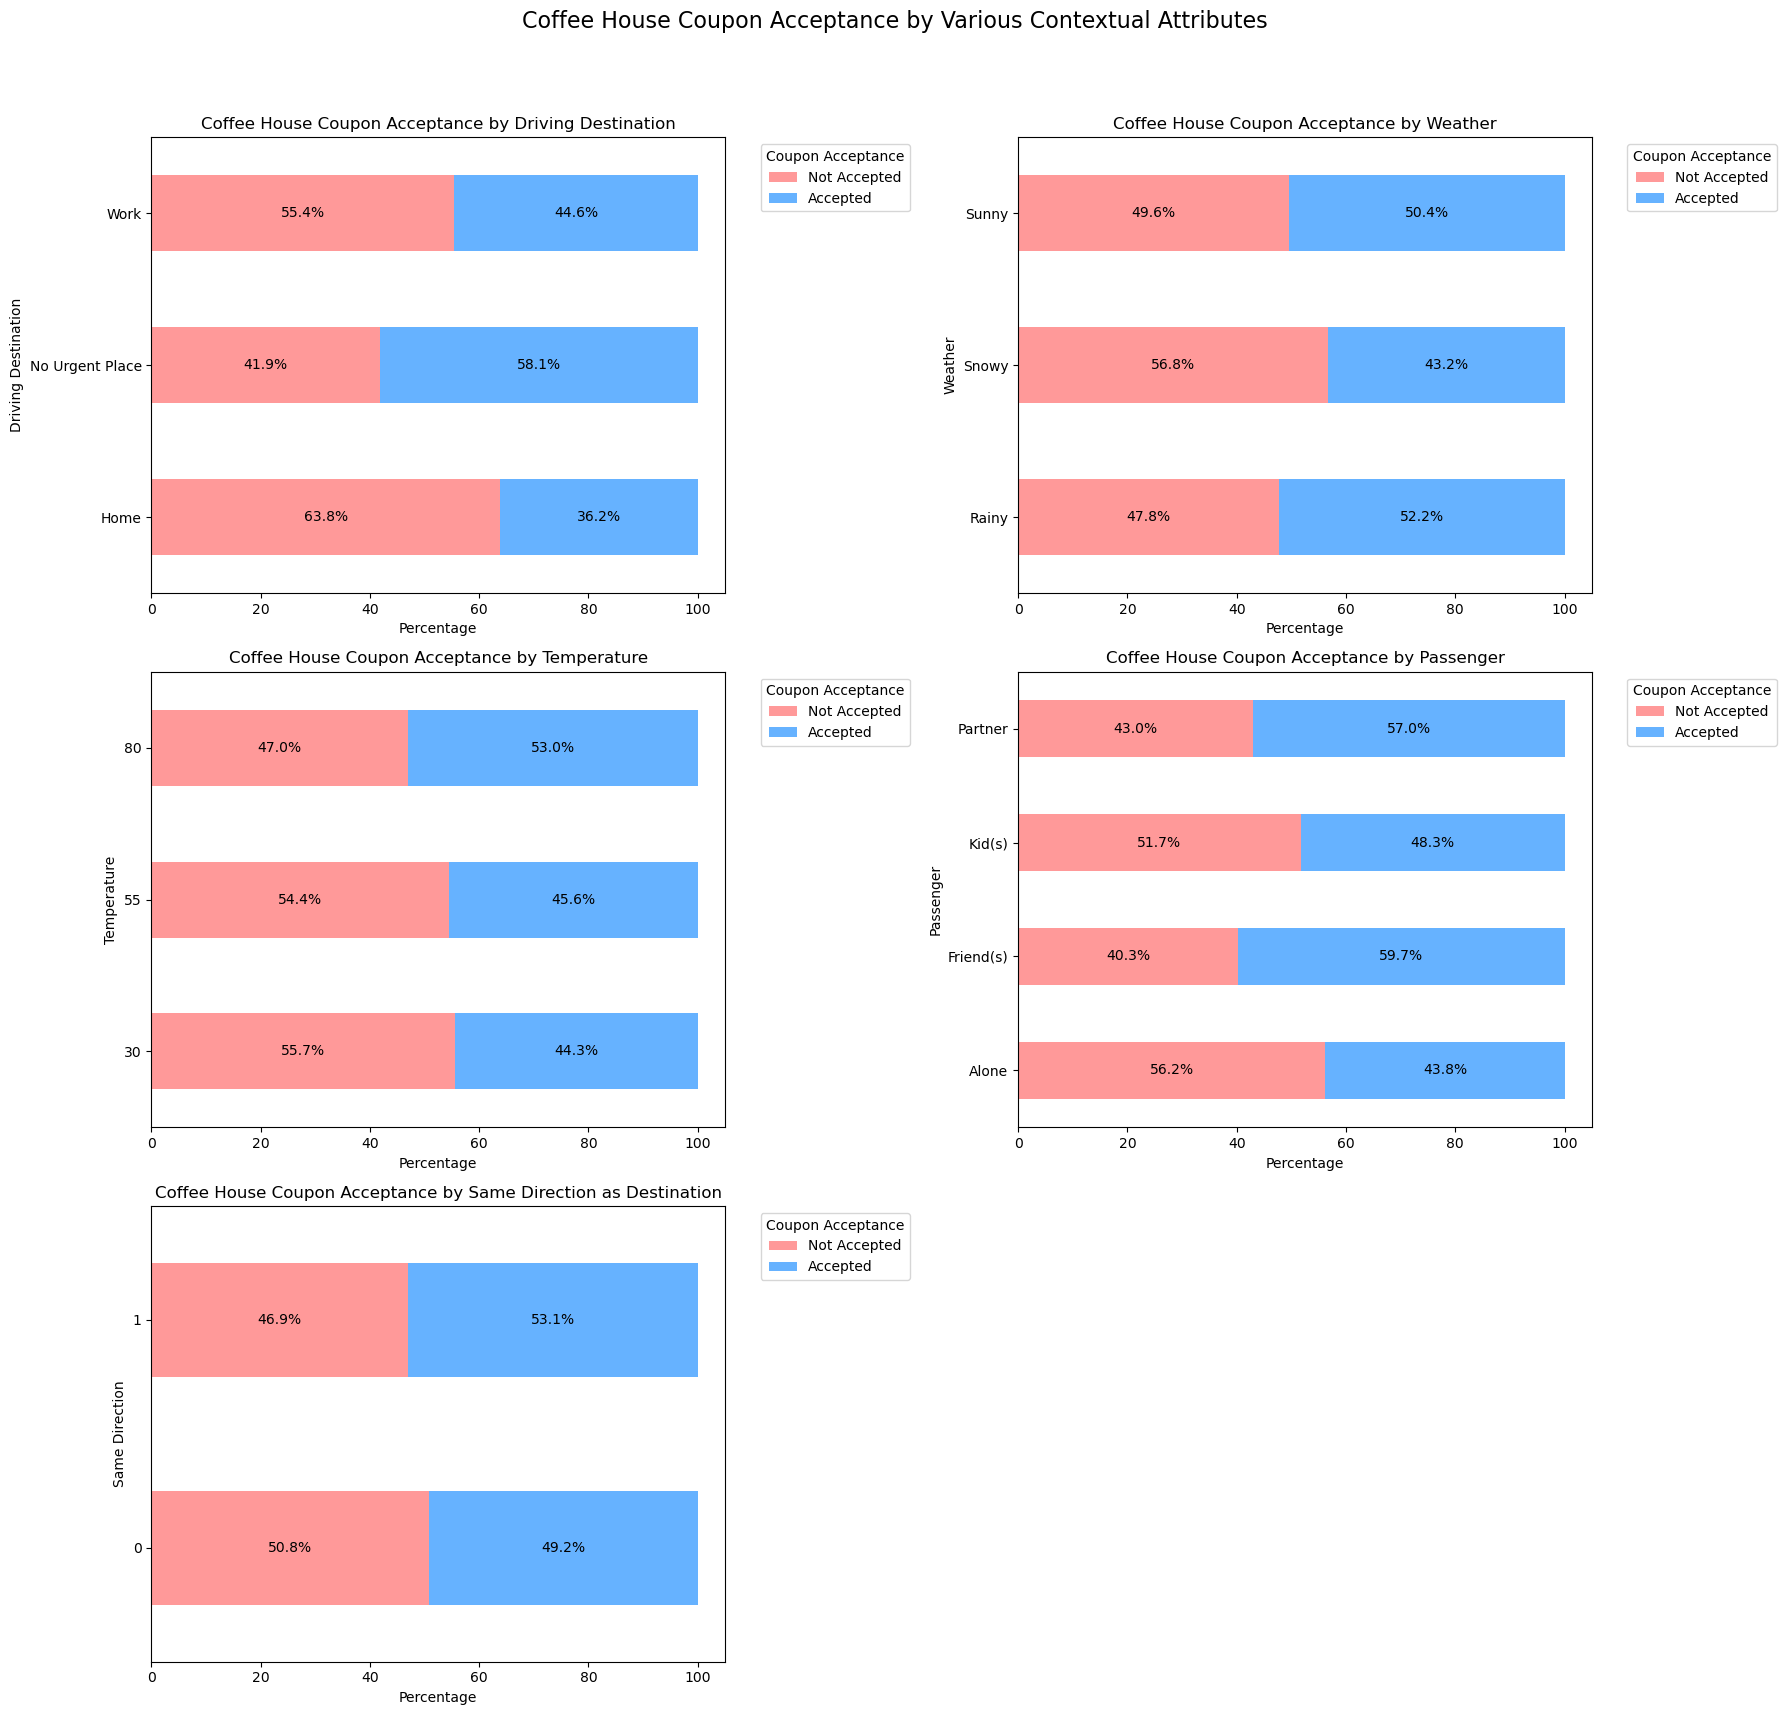

In [21]:


# Function to plot percentage stacked bar plots with labels
def plot_percentage(ax, data, x, hue, title, xlabel):
    # Calculate the percentage of each category
    percentages = data.groupby(x)[hue].value_counts(normalize=True).unstack(fill_value=0) * 100
    
    # Plot the percentage data as a horizontal bar plot
    bars = percentages.plot(kind='barh', stacked=True, color=['#FF9999', '#66B2FF'], ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Percentage')
    ax.set_ylabel(xlabel)
    ax.legend(title='Coupon Acceptance', labels=['Not Accepted', 'Accepted'], bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add percentage labels on bars
    for container in bars.containers:
        bars.bar_label(container, fmt='%.1f%%', label_type='center')

# Create subplots for each contextual attribute
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))
axes = axes.flatten()

# Driving destination
plot_percentage(axes[0], coffee_coupons_df, 'destination', 'Y', 'Coffee House Coupon Acceptance by Driving Destination', 'Driving Destination')

# Weather
plot_percentage(axes[1], coffee_coupons_df, 'weather', 'Y', 'Coffee House Coupon Acceptance by Weather', 'Weather')

# Temperature
plot_percentage(axes[2], coffee_coupons_df, 'temperature', 'Y', 'Coffee House Coupon Acceptance by Temperature', 'Temperature')

# Passenger
plot_percentage(axes[3], coffee_coupons_df, 'passanger', 'Y', 'Coffee House Coupon Acceptance by Passenger', 'Passenger')

# Same direction as destination
plot_percentage(axes[4], coffee_coupons_df, 'direction_same', 'Y', 'Coffee House Coupon Acceptance by Same Direction as Destination', 'Same Direction')

# Hide the empty subplot (axes[5])
axes[5].axis('off')

# Add an overall title to the figure
fig.suptitle('Coffee House Coupon Acceptance by Various Contextual Attributes', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# Save the plot to the 'images' folder
plt.savefig('images/Coffee_House_Coupon_Acceptance_Contextual_Attributes.png')

plt.show()


The chart indicates that individuals heading home are less likely to accept coffee house coupons compared to those going to work or an urgent place. Coupon acceptance is higher on rainy days compared to sunny or snowy days. Acceptance rates are higher at 80°F compared to lower temperatures. Passengers alone or with kids have lower acceptance rates compared to those with partners or friends. Lastly, individuals driving in the same direction as their destination have slightly higher acceptance rates.









g. How does the time of day affect the acceptance rate of coffee house coupons?



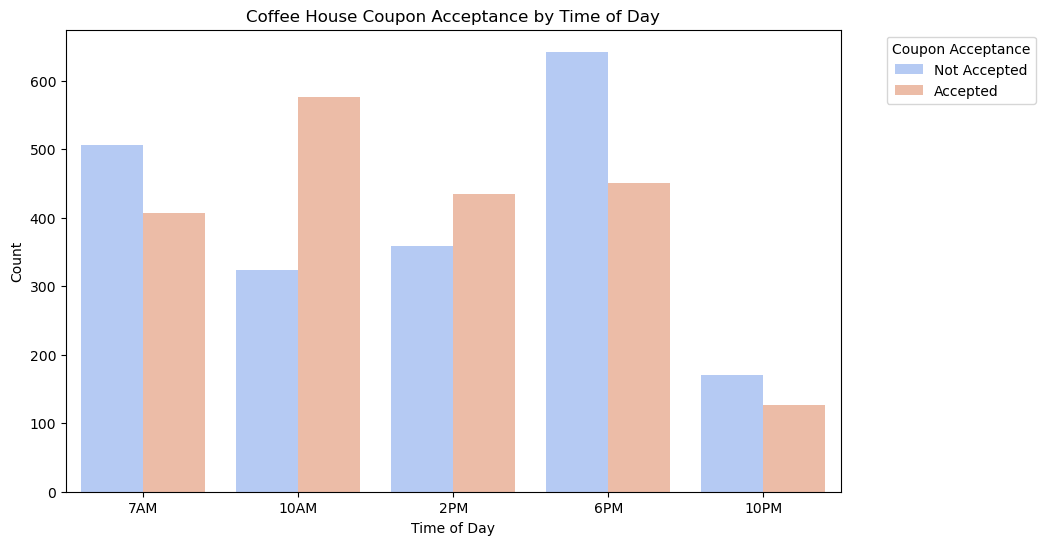

In [22]:


# Ensure the 'time' variable is ordered correctly
ordered_time = ['7AM', '10AM', '2PM', '6PM', '10PM']
coffee_coupons_df['time'] = pd.Categorical(coffee_coupons_df['time'], categories=ordered_time, ordered=True)

# Create the bar plot for the "Time" variable
plt.figure(figsize=(10, 6))
sns.countplot(data=coffee_coupons_df, x='time', hue='Y', palette='coolwarm')
plt.title('Coffee House Coupon Acceptance by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='Coupon Acceptance', labels=['Not Accepted', 'Accepted'], bbox_to_anchor=(1.05, 1), loc='upper left')



# Save the plot to the 'images' folder
plt.savefig('images/Coffee_House_Coupon_Acceptance_by_Time_of_Day.png')

plt.show()


The chart shows that coffee house coupons are most likely to be accepted at 10AM, with the highest count of accepted coupons. Acceptance rates are relatively balanced at 7AM, but they decrease significantly at 6PM and 10PM. The lowest acceptance rate is observed at 10PM, indicating that coupon acceptance is less favorable later in the evening.









### Findings



The analysis of coffee house coupon acceptance reveals several interesting patterns. The pie chart indicates that coupon acceptance is almost evenly split, with 49.7% of users accepting the coupon and 50.3% not accepting it. Younger individuals, specifically those aged 25-30 years, are more inclined to accept coffee house coupons. Additionally, higher income brackets, particularly those earning 75,000 and above, demonstrate higher acceptance rates. Notably, significant acceptance is also observed in the lower income groups earning less than 12,500 and between 12,500 and 24,999.

Frequent visitors to bars, coffee houses, and restaurants, who visit these places 1-3 times a month, show a higher likelihood of accepting coupons. Marital status also plays a role, with married partners and individuals without children exhibiting higher acceptance rates. Education level appears to have a consistent impact on acceptance, with some high school graduates showing higher acceptance rates. Occupations in the fields of education and healthcare are associated with higher acceptance rates, while those in protective services and legal professions show lower acceptance rates.

Contextual factors also influence coupon acceptance. Individuals heading home, experiencing sunny or rainy weather, and those driving alone or with friends are more likely to accept coupons. Furthermore, morning hours, specifically at 10 AM, see higher acceptance rates. These findings can help in tailoring marketing strategies to target specific demographics and contexts to increase the effectiveness of coupon campaigns.


### Next Steps


To increase acceptance rates, focus on younger individuals (25-30 years old) and higher-income groups ($75,000 and above) for coupon distribution. Tailor offers to frequent visitors of coffee houses, bars, and restaurants (1-3 times a month) to maximize coupon redemption. Develop personalized coupons for married partners and individuals without children, as they show a higher likelihood of acceptance. Distribute coupons during morning hours (10AM) and to individuals heading home, as acceptance rates are higher during these times and contexts. Leverage weather and passenger context to tailor offers. For instance, create special offers for sunny and rainy days, and for individuals driving alone or with friends. Finally, create special promotions targeting individuals in the education and healthcare sectors, who have shown higher acceptance rates for coffee house coupons.





